In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas
import numpy
import matplotlib
from env import *
from visualiser import *
from main import *
from constants import *
import xlsxwriter
from mpl_toolkits import mplot3d

pygame 2.0.1 (SDL 2.0.14, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
for goal_x in range(30, 180, 5):
	directory = '__run_w12_'+str(goal_x)
	if not os.path.exists(directory):
		os.makedirs(directory)

	env = Env(
		width=ENV_SIZE, height=ENV_SIZE, goal_x=goal_x, goal_y=100, N=ROBOT_NUMBER,
		desired_X=DX, desired_Y=DY, leader_x=30, leader_y=100, robot_radius=ROBOT_RADIUS,
		buffer_size=MAX_T
	)


	df = pandas.DataFrame(
		columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
				 'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
		)
	df.set_index('id', inplace=True)
	df1=pandas.DataFrame(columns=['id']+[i/10 for i in range(1,101)])
	df2=pandas.DataFrame(columns=['id']+[i/10 for i in range(1,101)])
	df3=pandas.DataFrame(columns=['id']+[i/10 for i in range(1,101)])
	df4=pandas.DataFrame(columns=['id']+[i/10 for i in range(1,101)])
	df5=pandas.DataFrame(columns=['id']+[i/10 for i in range(1,101)])
	df6=pandas.DataFrame(columns=['id']+[i/10 for i in range(1,101)])

	np1=numpy.zeros((100, 100))
	np2=numpy.zeros((100, 100))
	np3=numpy.zeros((100, 100))
	np4=numpy.zeros((100, 100))
	np5=numpy.zeros((100, 100))
	np6=numpy.zeros((100, 100))

	run = 0

	for n1 in range(1,101):
		df1_row=[0]*100
		df2_row=[0]*100
		df3_row=[0]*100
		df4_row=[0]*100
		df5_row=[0]*100
		df6_row=[0]*100

		for n2 in range(1,101):
			w1=n1/10
			w2=n2/10
			print(run)
			env.episode(w1, w2, reset_to_line=True)
	# 		episode_gui(env, w1, w2)
	# 		episode_gui(env, w1, w2)
			row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
			df.loc[run] = row
			print(row)
			env.save_episode(os.path.join(directory, str(run)))

			np1[n1-1, n2-1]=df1_row[n2-1]=row[2]
			np2[n1-1, n2-1]=df2_row[n2-1]=row[3]
			np3[n1-1, n2-1]=df3_row[n2-1]=row[4]
			np4[n1-1, n2-1]=df4_row[n2-1]=row[5]
			np5[n1-1, n2-1]=df5_row[n2-1]=row[6]
			np6[n1-1, n2-1]=df6_row[n2-1]=row[7]


			run = run + 1
		df1.loc[n1-1]=[n1/10]+df1_row
		df2.loc[n1-1]=[n1/10]+df2_row
		df3.loc[n1-1]=[n1/10]+df3_row
		df4.loc[n1-1]=[n1/10]+df4_row
		df5.loc[n1-1]=[n1/10]+df5_row
		df6.loc[n1-1]=[n1/10]+df6_row

	df1.set_index('id', inplace=True)
	df2.set_index('id', inplace=True)
	df3.set_index('id', inplace=True)
	df4.set_index('id', inplace=True)
	df5.set_index('id', inplace=True)
	df6.set_index('id', inplace=True)

	writer = pandas.ExcelWriter(os.path.join(directory, 'report.xls'), engine='xlsxwriter')

	df.to_excel(writer, sheet_name='report')
	df1.to_excel(writer, sheet_name='2')
	df2.to_excel(writer, sheet_name='3')
	df3.to_excel(writer, sheet_name='4')
	df4.to_excel(writer, sheet_name='5')
	df5.to_excel(writer, sheet_name='6')
	df6.to_excel(writer, sheet_name='7')
	writer.close()
	print(goal_x)

0
[0.1, 0.1, 9, 1.4210854715202004e-14, 10000, 0.0005537835152921987, 0, 0]
1
[0.1, 0.2, 9, 0.0, 10000, 0.02114577987092116, 0, 0]
2
[0.1, 0.3, 9, 0.0, 10000, 0.026982464178258083, 0, 0]
3
[0.1, 0.4, 9, 1.4210854715202004e-14, 10000, 0.027109282688936396, 0, 0]
4
[0.1, 0.5, 9, 0.0, 10000, 0.027225130844926598, 0, 0]
5
[0.1, 0.6, 9, 1.4210854715202004e-14, 10000, 0.027341434532947403, 0, 0]
6
[0.1, 0.7, 9, 1.4210854715202004e-14, 10000, 0.027457738220970276, 0, 0]
7
[0.1, 0.8, 9, 1.4210854715202004e-14, 10000, 0.027561586376959046, 0, 0]
8
[0.1, 0.9, 9, 0.0, 10000, 0.02767937524232729, 0, 0]
9
[0.1, 1.0, 9, 0.0, 10000, 0.027773434532949053, 0, 0]
10
[0.1, 1.1, 9, 1.4210854715202004e-14, 10000, 0.02788379751159204, 0, 0]
11
[0.1, 1.2, 9, 0.0, 10000, 0.027990464178259934, 0, 0]
12
[0.1, 1.3, 9, 0.0, 10000, 0.028089434532948983, 0, 0]
13
[0.1, 1.4, 9, 0.0, 10000, 0.028192708575660617, 0, 0]
14
[0.1, 1.5, 9, 0.0, 10000, 0.028328286306394636, 0, 0]
15
[0.1, 1.6, 9, 0.0, 10000, 0.028398919710

[0.2, 3.8, 9, 0.0, 10000, 0.09909371549354816, 0, 0]
138
[0.2, 3.9, 9, 0.0, 10000, 0.11090429354130765, 0, 0]
139
[0.2, 4.0, 9, 0.0, 10000, 0.110927838009274, 0, 0]
140
[0.2, 4.1, 9, 0.0, 10000, 0.11096738247724033, 0, 0]
141
[0.2, 4.2, 9, 0.0, 10000, 0.11102292694520666, 0, 0]
142
[0.2, 4.3, 9, 0.0, 10000, 0.11109447141317295, 0, 0]
143
[0.2, 4.4, 9, 0.0, 10000, 0.1111820158811393, 0, 0]
144
[0.2, 4.5, 9, 0.0, 10000, 0.11128556034910561, 0, 0]
145
[0.2, 4.6, 9, 0.0, 10000, 0.11140510481707193, 0, 0]
146
[0.2, 4.7, 9, 0.0, 10000, 0.11154064928503833, 0, 0]
147
[0.2, 4.8, 9, 0.0, 10000, 0.11169219375300458, 0, 0]
148
[0.2, 4.9, 9, 0.0, 10000, 0.11185973822097124, 0, 0]
149
[0.2, 5.0, 9, 0.0, 10000, 0.11204328268893739, 0, 0]
150
[0.2, 5.1, 9, 1.4210854715202004e-14, 10000, 0.02655047364724577, 0, 0]
151
[0.2, 5.2, 9, 0.0, 10000, 0.11233323786814271, 0, 0]
152
[0.2, 5.3, 9, 0.0, 10000, 0.1123422675134536, 0, 0]
153
[0.2, 5.4, 9, 0.0, 10000, 0.1123592971587645, 0, 0]
154
[0.2, 5.5, 9, 0.0

[0.3, 6.6, 9, 1.4210854715202004e-14, 10000, 0.24663216772514934, 0, 0]
266
[0.3, 6.7, 9, 1.4210854715202004e-14, 10000, 0.24675853070379358, 0, 0]
267
[0.3, 6.8, 9, 1.4210854715202004e-14, 10000, 0.24689289368243622, 0, 0]
268
[0.3, 6.9, 9, 1.4210854715202004e-14, 10000, 0.24703525666108198, 0, 0]
269
[0.3, 7.0, 9, 1.4210854715202004e-14, 10000, 0.2471856196397262, 0, 0]
270
[0.3, 7.1, 9, 1.4210854715202004e-14, 10000, 0.24734398261836887, 0, 0]
271
[0.3, 7.2, 9, 1.4210854715202004e-14, 10000, 0.24751034559701465, 0, 0]
272
[0.3, 7.3, 9, 1.4210854715202004e-14, 10000, 0.24768470857565725, 0, 0]
273
[0.3, 7.4, 9, 1.4210854715202004e-14, 10000, 0.24786707155430307, 0, 0]
274
[0.3, 7.5, 9, 0.0, 10000, 0.1272482046135381, 0, 0]
275
[0.3, 7.6, 9, 0.0, 10000, 0.008667113219696926, 0, 0]
276
[0.3, 7.7, 9, 0.0, 10000, 0.10337935515918766, 0, 0]
277
[0.3, 7.8, 9, 1.4210854715202004e-14, 10000, 0.24860482283378915, 0, 0]
278
[0.3, 7.9, 9, 1.4210854715202004e-14, 10000, 0.24860733765644463, 0, 0

[0.4, 10.0, 9, 0.0, 10000, 0.43604348226554157, 0, 0]
400
[0.5, 0.1, 9, 0.0, 10000, 0.027225130844925324, 0, 0]
401
[0.5, 0.2, 9, 0.0, 10000, 0.10716491971028486, 0, 0]
402
[0.5, 0.3, 9, 0.0, 10000, 0.09552859816850941, 0, 0]
403
[0.5, 0.4, 9, 0.0, 10000, 0.4029645824737803, 0, 0]
404
[0.5, 0.5, 9, 0.0, 10000, 0.09577987749974731, 0, 0]
405
[0.5, 0.6, 9, 0.0, 10000, 0.45180506027173195, 0, 0]
406
[0.5, 0.7, 9, 0.0, 10000, 0.12025312857325894, 0, 0]
407
[0.5, 0.8, 9, 0.0, 10000, 0.12036904457690654, 0, 0]
408
[0.5, 0.9, 9, 0.0, 10000, 0.45224845253895773, 0, 0]
409
[0.5, 1.0, 9, 0.0, 10000, 0.6675479826183734, 0, 0]
410
[0.5, 1.1, 9, 0.0, 10000, 0.09647679649666512, 0, 0]
411
[0.5, 1.2, 9, 1.4210854715202004e-14, 10000, 0.6678021937529908, 0, 0]
412
[0.5, 1.3, 9, 0.0, 10000, 0.4042990282002621, 0, 0]
413
[0.5, 1.4, 9, 0.0, 10000, 0.6680743455970131, 0, 0]
414
[0.5, 1.5, 9, 0.0, 10000, 0.09692243616229054, 0, 0]
415
[0.5, 1.6, 9, 0.0, 10000, 0.6683644381503966, 0, 0]
416
[0.5, 1.7, 9, 0.

[0.6, 4.5, 9, 0.0, 10000, 0.7023741035725045, 0, 0]
545
[0.6, 4.6, 9, 0.0, 10000, 0.12453228860987797, 0, 0]
546
[0.6, 4.7, 9, 1.4210854715202004e-14, 10000, 0.02655047364724577, 0, 0]
547
[0.6, 4.8, 9, 0.0, 10000, 0.4084286586846182, 0, 0]
548
[0.6, 4.9, 9, 0.0, 10000, 0.9656975415561665, 0, 0]
549
[0.6, 5.0, 9, 0.0, 10000, 0.9657039045348108, 0, 0]
550
[0.6, 5.1, 9, 0.0, 10000, 0.9657182675134535, 0, 0]
551
[0.6, 5.2, 9, 0.0, 10000, 0.9657406304920995, 0, 0]
552
[0.6, 5.3, 9, 0.0, 10000, 0.9657709934707437, 0, 0]
553
[0.6, 5.4, 9, 0.0, 10000, 0.9658093564493876, 0, 0]
554
[0.6, 5.5, 9, 0.0, 10000, 0.9658557194280318, 0, 0]
555
[0.6, 5.6, 9, 0.0, 10000, 0.9659100824066745, 0, 0]
556
[0.6, 5.7, 9, 0.0, 10000, 0.9659724453853187, 0, 0]
557
[0.6, 5.8, 9, 0.0, 10000, 0.9660428083639628, 0, 0]
558
[0.6, 5.9, 9, 0.0, 10000, 0.9661211713426088, 0, 0]
559
[0.6, 6.0, 9, 0.0, 10000, 0.9662075343212532, 0, 0]
560
[0.6, 6.1, 9, 0.0, 10000, 0.9663018972998972, 0, 0]
561
[0.6, 6.2, 9, 0.0, 10000, 0

[0.7, 9.0, 9, 0.0, 10000, 1.3157710007056576, 0, 0]
690
[0.7, 9.1, 9, 0.0, 10000, 1.3158108488616465, 0, 0]
691
[0.7, 9.2, 9, 0.0, 10000, 1.3158533636842993, 0, 0]
692
[0.7, 9.3, 9, 0.0, 10000, 1.3158985451736214, 0, 0]
693
[0.7, 9.4, 9, 0.0, 10000, 1.3159463933296127, 0, 0]
694
[0.7, 9.5, 9, 0.0, 10000, 1.3159969081522682, 0, 0]
695
[0.7, 9.6, 9, 0.0, 10000, 1.3160500896415903, 0, 0]
696
[0.7, 9.7, 9, 0.0, 10000, 1.316105937797579, 0, 0]
697
[0.7, 9.8, 9, 0.0, 10000, 1.3161644526202345, 0, 0]
698
[0.7, 9.9, 9, 0.0, 10000, 1.3162256341095566, 0, 0]
699
[0.7, 10.0, 9, 0.0, 10000, 1.3162894822655453, 0, 0]
700
[0.8, 0.1, 9, 1.4210854715202004e-14, 10000, 0.027561586376955494, 0, 0]
701
[0.8, 0.2, 9, 0.0, 10000, 0.09577987749974781, 0, 0]
702
[0.8, 0.3, 9, 1.4210854715202004e-14, 10000, 0.24080307155430308, 0, 0]
703
[0.8, 0.4, 9, 0.0, 10000, 0.12025312857325894, 0, 0]
704
[0.8, 0.5, 9, 0.0, 10000, 0.1203690445769086, 0, 0]
705
[0.8, 0.6, 9, 0.0, 10000, 0.4522484525389522, 0, 0]
706
[0.8,

[0.9, 1.8, 9, 0.0, 10000, 0.40539184344243884, 0, 0]
818
[0.9, 1.9, 9, 0.0, 10000, 2.16180744176786, 0, 0]
819
[0.9, 2.0, 9, 0.0, 10000, 2.1618333492144726, 0, 0]
820
[0.9, 2.1, 9, 0.0, 10000, 1.7577247980152795, 0, 0]
821
[0.9, 2.2, 9, 0.0, 10000, 0.26164118017133475, 0, 0]
822
[0.9, 2.3, 9, 0.0, 10000, 0.0982308956607453, 0, 0]
823
[0.9, 2.4, 9, 1.4210854715202004e-14, 10000, 1.2674939444834517, 0, 0]
824
[0.9, 2.5, 9, 0.0, 10000, 2.1626480491439053, 0, 0]
825
[0.9, 2.6, 9, 0.0, 10000, 2.1626767751011937, 0, 0]
826
[0.9, 2.7, 9, 0.0, 10000, 2.1627321677251485, 0, 0]
827
[0.9, 2.8, 9, 0.0, 10000, 2.1628142270157706, 0, 0]
828
[0.9, 2.9, 9, 1.4210854715202004e-14, 10000, 1.0002403630521957, 0, 0]
829
[0.9, 3.0, 9, 0.0, 10000, 0.12316837260621014, 0, 0]
830
[0.9, 3.1, 9, 0.0, 10000, 0.09909371549355094, 0, 0]
831
[0.9, 3.2, 9, 0.0, 10000, 0.9280163917142232, 0, 0]
832
[0.9, 3.3, 9, 0.0, 10000, 2.163790900917353, 0, 0]
833
[0.9, 3.4, 9, 0.0, 10000, 2.163802445385313, 0, 0]
834
[0.9, 3.5,

[1.0, 5.9, 9, 0.0, 10000, 2.6728192306332206, 0, 0]
959
[1.0, 6.0, 9, 0.0, 10000, 2.6729269269452045, 0, 0]
960
[1.0, 6.1, 9, 0.0, 10000, 2.6730426232571762, 0, 0]
961
[1.0, 6.2, 9, 0.0, 10000, 2.6731663195691597, 0, 0]
962
[1.0, 6.3, 9, 0.0, 10000, 2.673298015881137, 0, 0]
963
[1.0, 6.4, 9, 0.0, 10000, 2.6734377121931034, 0, 0]
964
[1.0, 6.5, 9, 0.0, 10000, 1.7627514787950647, 0, 0]
965
[1.0, 6.6, 9, 1.4210854715202004e-14, 10000, 1.004290387401239, 0, 0]
966
[1.0, 6.7, 9, 0.0, 10000, 0.45912262934071657, 0, 0]
967
[1.0, 6.8, 9, 0.0, 10000, 0.12724820461353942, 0, 0]
968
[1.0, 6.9, 9, 0.0, 10000, 0.008667113219696926, 0, 0]
969
[1.0, 7.0, 9, 0.0, 10000, 0.10337935515918766, 0, 0]
970
[1.0, 7.1, 9, 0.0, 10000, 0.41138493043201796, 0, 0]
971
[1.0, 7.2, 9, 0.0, 10000, 0.9326838390381589, 0, 0]
972
[1.0, 7.3, 9, 0.0, 10000, 1.6672760809776492, 0, 0]
973
[1.0, 7.4, 9, 0.0, 10000, 2.6151616562504785, 0, 0]
974
[1.0, 7.5, 9, 0.0, 10000, 2.675555278365822, 0, 0]
975
[1.0, 7.6, 9, 0.0, 10000, 

[1.2, 0.1, 9, 0.0, 10000, 0.027990464178258657, 0, 0]
1101
[1.2, 0.2, 9, 0.0, 10000, 0.10800091971028955, 0, 0]
1102
[1.2, 0.3, 9, 1.4210854715202004e-14, 10000, 0.24131834559700446, 0, 0]
1103
[1.2, 0.4, 9, 0.0, 10000, 0.09647679649666174, 0, 0]
1104
[1.2, 0.5, 9, 1.4210854715202004e-14, 10000, 0.6678021937529908, 0, 0]
1105
[1.2, 0.6, 9, 0.0, 10000, 0.4042990282002621, 0, 0]
1106
[1.2, 0.7, 9, 0.0, 10000, 0.9979163143541476, 0, 0]
1107
[1.2, 0.8, 9, 0.0, 10000, 0.09692243616228888, 0, 0]
1108
[1.2, 0.9, 9, 0.0, 10000, 2.160599712193115, 0, 0]
1109
[1.2, 1.0, 9, 0.0, 10000, 0.4532503088952842, 0, 0]
1110
[1.2, 1.1, 9, 0.0, 10000, 0.22443774717839496, 0, 0]
1111
[1.2, 1.2, 9, 0.0, 10000, 2.6071385187948457, 0, 0]
1112
[1.2, 1.3, 9, 0.0, 10000, 1.7570492377553193, 0, 0]
1113
[1.2, 1.4, 9, 0.0, 10000, 0.1217925405988878, 0, 0]
1114
[1.2, 1.5, 9, 0.0, 10000, 0.40539184344244394, 0, 0]
1115
[1.2, 1.6, 9, 0.0, 10000, 2.6078471462859802, 0, 0]
1116
[1.2, 1.7, 9, 0.0, 10000, 3.840919804746505

[1.3, 4.1, 9, 0.0, 10000, 0.4084286586846182, 0, 0]
1241
[1.3, 4.2, 9, 1.4210854715202004e-14, 10000, 1.270166843722002, 0, 0]
1242
[1.3, 4.3, 9, 0.0, 10000, 2.611765028759347, 0, 0]
1243
[1.3, 4.4, 9, 0.0, 10000, 4.4332232137967384, 0, 0]
1244
[1.3, 4.5, 9, 0.0, 10000, 4.511825026733517, 0, 0]
1245
[1.3, 4.6, 9, 0.0, 10000, 4.511836723045494, 0, 0]
1246
[1.3, 4.7, 9, 0.0, 10000, 4.511856419357472, 0, 0]
1247
[1.3, 4.8, 9, 0.0, 10000, 4.511884115669449, 0, 0]
1248
[1.3, 4.9, 9, 0.0, 10000, 4.511919811981416, 0, 0]
1249
[1.3, 5.0, 9, 0.0, 10000, 4.511963508293394, 0, 0]
1250
[1.3, 5.1, 9, 0.0, 10000, 4.512015204605372, 0, 0]
1251
[1.3, 5.2, 9, 0.0, 10000, 4.512074900917335, 0, 0]
1252
[1.3, 5.3, 9, 0.0, 10000, 4.512142597229337, 0, 0]
1253
[1.3, 5.4, 9, 0.0, 10000, 4.512218293541315, 0, 0]
1254
[1.3, 5.5, 9, 0.0, 10000, 4.512301989853292, 0, 0]
1255
[1.3, 5.6, 9, 0.0, 10000, 4.51239368616527, 0, 0]
1256
[1.3, 5.7, 9, 0.0, 10000, 4.512493382477247, 0, 0]
1257
[1.3, 5.8, 9, 0.0, 10000, 4.

[1.4, 7.5, 9, 1.4210854715202004e-14, 10000, 5.235507278365797, 0, 0]
1375
[1.4, 7.6, 9, 1.4210854715202004e-14, 10000, 5.235516459855126, 0, 0]
1376
[1.4, 7.7, 9, 1.4210854715202004e-14, 10000, 5.235528308011116, 0, 0]
1377
[1.4, 7.8, 9, 1.4210854715202004e-14, 10000, 5.2355428228337635, 0, 0]
1378
[1.4, 7.9, 9, 1.4210854715202004e-14, 10000, 5.235560004323086, 0, 0]
1379
[1.4, 8.0, 9, 1.4210854715202004e-14, 10000, 5.235579852479081, 0, 0]
1380
[1.4, 8.1, 9, 1.4210854715202004e-14, 10000, 5.2356023673017305, 0, 0]
1381
[1.4, 8.2, 9, 1.4210854715202004e-14, 10000, 5.235627548791052, 0, 0]
1382
[1.4, 8.3, 9, 1.4210854715202004e-14, 10000, 5.235655396947048, 0, 0]
1383
[1.4, 8.4, 9, 1.4210854715202004e-14, 10000, 5.235685911769703, 0, 0]
1384
[1.4, 8.5, 9, 1.4210854715202004e-14, 10000, 5.23571909325902, 0, 0]
1385
[1.4, 8.6, 9, 1.4210854715202004e-14, 10000, 5.235754941415008, 0, 0]
1386
[1.4, 8.7, 9, 1.4210854715202004e-14, 10000, 5.235793456237663, 0, 0]
1387
[1.4, 8.8, 9, 1.42108547

In [ ]:
img_dir='plots1'
if not os.path.exists(img_dir):
	os.makedirs(img_dir)
for goal_x in range(30, 180, 5):
	directory = '__run_w12_'+str(goal_x)
	file_name=os.path.join(directory, 'report.xls')
	df=pandas.read_excel(file_name, sheet_name='report')
	W1=numpy.outer(numpy.array(range(1, 101))/10, numpy.ones(100))
	W2=W1.copy().T

	np1=numpy.zeros((100, 100))
	np2=numpy.zeros((100, 100))
	np3=numpy.zeros((100, 100))
	np4=numpy.zeros((100, 100))
	np5=numpy.zeros((100, 100))
	np6=numpy.zeros((100, 100))
	for _, row in df.iterrows():
		n1=int(row[df.columns[1]]*10)
		n2=int(row[df.columns[2]]*10)
		np1[n1-1, n2-1]=row[df.columns[3]]
		np2[n1-1, n2-1]=row[df.columns[4]]
		np3[n1-1, n2-1]=row[df.columns[5]]
		np4[n1-1, n2-1]=row[df.columns[6]]
		np5[n1-1, n2-1]=row[df.columns[7]]
		np6[n1-1, n2-1]=row[df.columns[8]]

	fig = plt.figure( figsize=(10, 15) )
	ax=fig.add_subplot(3,2, 1, projection='3d')
	ax.azim=60    
	ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[0]+'(w2)', zlabel=df.columns[7])
	ax.plot_surface(W1, W2, np5,cmap ='viridis', edgecolor ='green')

	ax=fig.add_subplot(3, 2, 2, projection='3d')
	ax.azim=60
	ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[8])
	ax.plot_surface(W1, W2, np6,cmap ='viridis', edgecolor ='green')

	ax=fig.add_subplot(3, 2, 3, projection='3d')
	ax.azim=60
	ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[5])
	ax.plot_surface(W1, W2, np3,cmap ='viridis', edgecolor ='green')

	ax=fig.add_subplot(3, 2, 4, projection='3d')
	ax.azim=60
	ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[6])
	ax.plot_surface(W1, W2, np4,cmap ='viridis', edgecolor ='green')

	ax=fig.add_subplot(3, 2, 5, projection='3d')
	ax.azim=60
	ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[3])
	ax.plot_surface(W1, W2, np1,cmap ='viridis', edgecolor ='green')

	ax=fig.add_subplot(3, 2, 6, projection='3d')
	ax.azim=60
	ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[4])
	ax.plot_surface(W1, W2, np2,cmap ='viridis', edgecolor ='green')
	plt.show()
	fig.savefig(os.path.join(img_dir, str(goal_x)+'.png'))


In [7]:
print(ax.elev)

30


In [9]:
env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	desired_X=DX, desired_Y=DY, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	buffer_size=MAX_T
)

In [ ]:

directory = '_run_w1'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w2 = 1
run = 0
for w1 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)

	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[0], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[0.0, 1, 9, 0.0, 141, 0.014, 0, 139]
1
[0.1, 1, 9, 0.0, 160, 0.014105341979559727, 158, 139]
2
[0.2, 1, 9, 0.0, 141, 0.014210675312893063, 79, 139]
3
[0.30000000000000004, 1, 9, 0.0, 141, 0.014314979000915514, 52, 139]
4
[0.4, 1, 9, 0.0, 141, 0.014418979000915507, 39, 140]
5
[0.5, 1, 9, 0.0, 141, 0.01452313084492674, 31, 139]
6
[0.6000000000000001, 1, 9, 0.0, 141, 0.014626979000915514, 27, 140]
7
[0.7000000000000001, 1, 9, 0.0, 141, 0.014729949355604646, 22, 139]
8
[0.8, 1, 9, 0.0, 141, 0.014835586376960428, 19, 140]
9
[0.9, 1, 9, 0.0, 141, 0.0149354345329492, 17, 139]
10
[1.0, 1, 9, 0.0, 141, 0.015043890064982877, 15, 139]
11
[1.1, 1, 9, 0.0, 141, 0.015140616022271309, 14, 139]
12
[1.2000000000000002, 1, 9, 0.0, 141, 0.015250979000915519, 13, 140]
13
[1.3, 1, 9, 0.0, 141, 0.015354979000915515, 12, 140]
14
[1.4000000000000001, 1, 9, 0.0, 141, 0.015448616022271305, 11, 139]
15
[1.5, 1, 9, 0.0, 141, 0.015543890064982864, 10, 140]
16
[1.6, 1, 9, 0.0, 141, 0.015668801129050218, 9, 139]
1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\users\abzza.desktop-sanblt2\pycharmprojects\swarmemul\venvwin\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_12488/1273160858.py", line 18, in <module>
    row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
  File "D:\Users\abzza.DESKTOP-SANBLT2\PycharmProjects\swarmEmul\main.py", line 29, in meanV
    Vd = numpy.power(Vx, 2) + numpy.power(Vy, 2)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\users\abzza.desktop-sanblt2\pycharmprojects\swarmemul\venvwin\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

Du

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\users\abzza.desktop-sanblt2\pycharmprojects\swarmemul\venvwin\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_12488/1273160858.py", line 18, in <module>
    row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
  File "D:\Users\abzza.DESKTOP-SANBLT2\PycharmProjects\swarmEmul\main.py", line 29, in meanV
    Vd = numpy.power(Vx, 2) + numpy.power(Vy, 2)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\users\abzza.desktop-sanblt2\pycharmprojects\swarmemul\venvwin\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

Du

In [32]:

directory = '_run_w2'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w1 = 1
run = 0
for w2 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)
	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[1], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[1, 0.0, 9, 140.0, 17, 0.0010438900649828774, 15, 0]
1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\users\abzza.desktop-sanblt2\pycharmprojects\swarmemul\venvwin\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_12488/3226851432.py", line 15, in <module>
    env.episode(w1, w2, reset_to_line=True)
  File "D:\Users\abzza.DESKTOP-SANBLT2\PycharmProjects\swarmEmul\env.py", line 124, in episode
    self.play_step(w1, w2)
  File "D:\Users\abzza.DESKTOP-SANBLT2\PycharmProjects\swarmEmul\env.py", line 143, in play_step
    self.reset_leader()
  File "D:\Users\abzza.DESKTOP-SANBLT2\PycharmProjects\swarmEmul\env.py", line 157, in reset_leader
    xl, yl = virtual_leader_position(self.agents)
  File "D:\Users\abzza.DESKTOP-SANBLT2\PycharmProjects\swarmEmul\env.py", line 426, in virtual_leader_position
    return numpy.mean(x - dx), numpy.mean(y - dy)
KeyboardInterrupt

During handling of the above exception, anot

TypeError: object of type 'NoneType' has no len()

In [ ]:

directory = '_run_w15'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w2 = 5
run = 0
for w1 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)

	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[0], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

In [ ]:

directory = '_run_w25'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w1 = 1
run = 0
for w2 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)
	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[1], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))


In [4]:
W1=numpy.outer(numpy.array(range(1, 101))/10, numpy.ones(100))
W2=W1.copy().T
directory = '_run_w12_'
file_name=os.path.join(directory, 'report.xls')
df=pandas.read_excel(file_name, sheet_name='report')
# print(df.columns)


np1=numpy.zeros((100, 100))
np2=numpy.zeros((100, 100))
np3=numpy.zeros((100, 100))
np4=numpy.zeros((100, 100))
np5=numpy.zeros((100, 100))
np6=numpy.zeros((100, 100))
for _, row in df.iterrows():
	n1=int(row[df.columns[1]]*10)
	n2=int(row[df.columns[2]]*10)
	np1[n1-1, n2-1]=row[df.columns[3]]
	np2[n1-1, n2-1]=row[df.columns[4]]
	np3[n1-1, n2-1]=row[df.columns[5]]
	np4[n1-1, n2-1]=row[df.columns[6]]
	np5[n1-1, n2-1]=row[df.columns[7]]
	np6[n1-1, n2-1]=row[df.columns[8]]

<IPython.core.display.Javascript object>


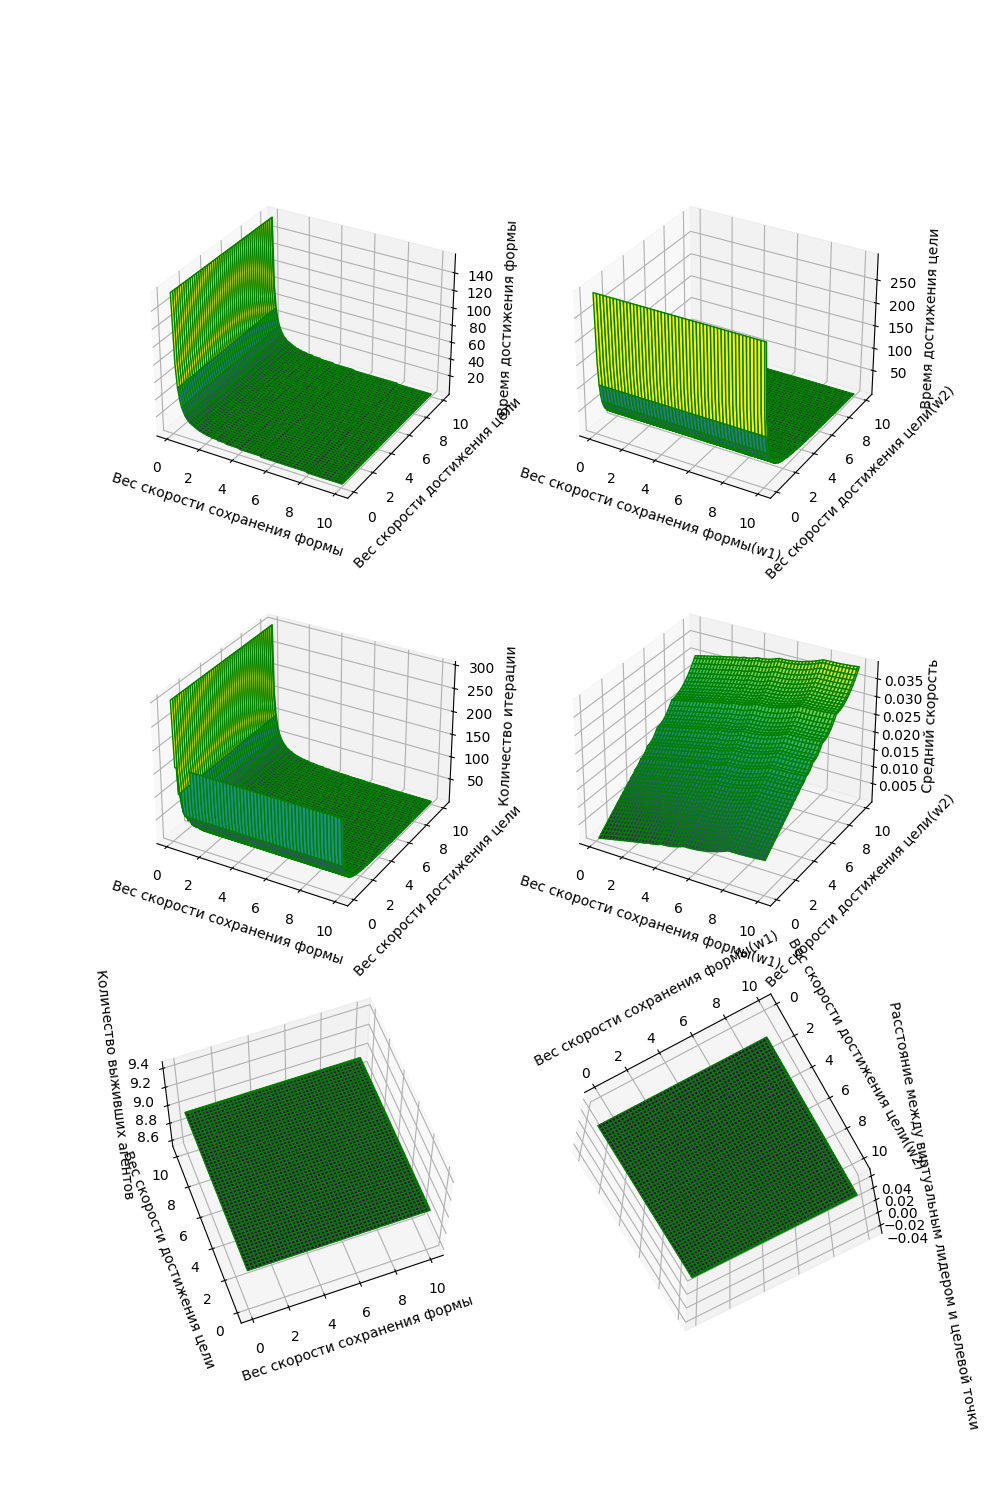

In [7]:

# %matplotlib notebook
#
# %matplotlib notebook
#
# %matplotlib notebook

fig = plt.figure( figsize=(10, 15) )
ax=fig.add_subplot(3,2, 1, projection='3d')
ax.set(xlabel=df.columns[1], ylabel=df.columns[2], zlabel=df.columns[7])
ax.plot_surface(W1, W2, np5,cmap ='viridis', edgecolor ='green')

ax=fig.add_subplot(3, 2, 2, projection='3d')
ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[8])
ax.plot_surface(W1, W2, np6,cmap ='viridis', edgecolor ='green')

ax=fig.add_subplot(3, 2, 3, projection='3d')
ax.set(xlabel=df.columns[1], ylabel=df.columns[2], zlabel=df.columns[5])
ax.plot_surface(W2, W1, np3,cmap ='viridis', edgecolor ='green')

ax=fig.add_subplot(3, 2, 4, projection='3d')
ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[6])
ax.plot_surface(W1, W2, np4,cmap ='viridis', edgecolor ='green')

ax=fig.add_subplot(3, 2, 5, projection='3d')
ax.set(xlabel=df.columns[1], ylabel=df.columns[2], zlabel=df.columns[3])
ax.plot_surface(W1, W2, np1,cmap ='viridis', edgecolor ='green')

ax=fig.add_subplot(3, 2, 6, projection='3d')
ax.set(xlabel=df.columns[1]+'(w1)', ylabel=df.columns[2]+'(w2)', zlabel=df.columns[4])
ax.plot_surface(W1, W2, np2,cmap ='viridis', edgecolor ='green')
plt.show()

<IPython.core.display.Javascript object>


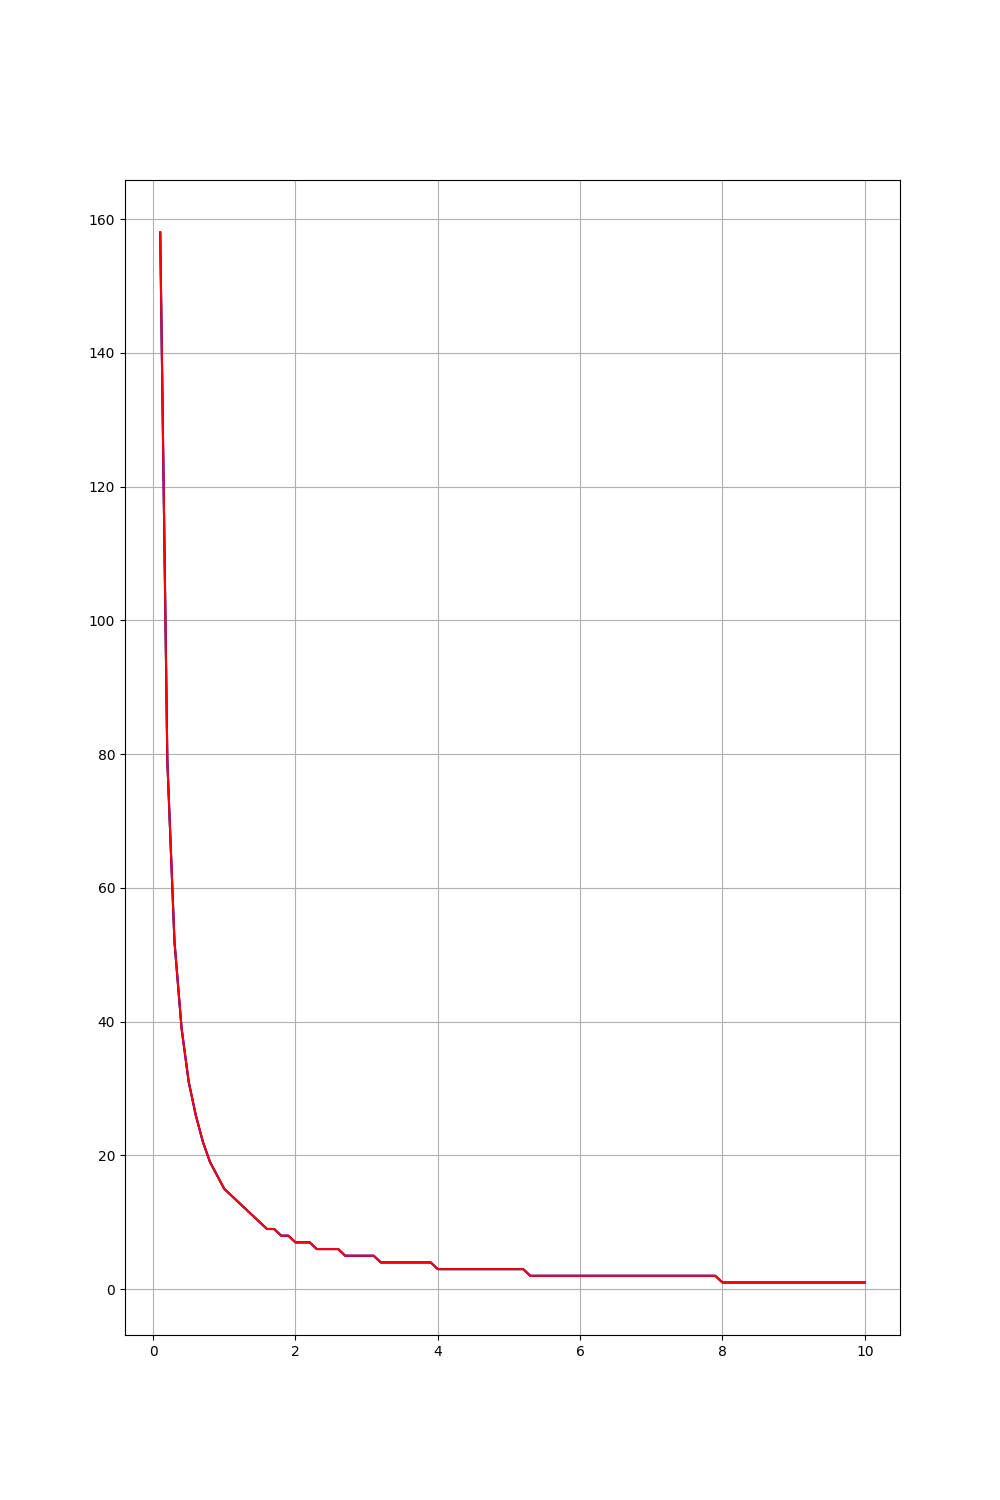

In [6]:
fig = plt.figure( figsize=(10, 15) )
ax=fig.add_subplot(1,1, 1)
plt.plot(W1[:, 0], np5[:, 0])
plt.plot(W1[:, 0], np5[:, 1], 'b')
plt.plot(W1[:, 0], np5[:, 5], 'r')
plt.grid()


In [ ]:
episode_gui(env, w1, w2)

In [ ]:
#current_episode_replay(env)
directory = '_run_w1'
show_episode(directory, 98)

In [ ]:
full_report = 'report.xls'
writer = pandas.ExcelWriter(full_report, engine='xlsxwriter')



#workbook.close()








w2=1
w3=1

In [ ]:
fill_report_with_graph('_run_w1', 0, writer=writer)
# df=pandas.read_excel('_run_w1/report.xls')
# df.plot(x=df.columns[2] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w3=1

In [ ]:
fill_report_with_graph('_run_w2', 1,  writer=writer)

# df=pandas.read_excel('_run_w2/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w3=1

In [ ]:
fill_report_with_graph('_run_w15', 0,  writer=writer)

# df=pandas.read_excel('_run_w2_w15/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=1

In [ ]:
fill_report_with_graph('_run_w25', 1, writer=writer)

# df=pandas.read_excel('_run_w3/report.xls')
# df.plot(x=df.columns[4] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=0

In [ ]:
writer.close()


In [ ]:
current_episode_replay(env)